## Исследование данных о российском кинопрокате



# Введение

**Описание проекта**  
    
    Заказчик этого исследования — Министерство культуры Российской Федерации. Работа будет проводиться с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 
  

**Цель проекта**  
	
    Необходимо изучить рынок российского кинопроката и выявить текущие тренды, уделить внимание фильмам, которые получили государственную поддержку, а также ответить на вопрос, насколько такие фильмы интересны зрителю. 

**Описание данных**  

    •	title — название фильма;
    •	puNumber — номер прокатного удостоверения;
    •	show_start_date — дата премьеры фильма;
    •	type — тип фильма;
    •	film_studio — студия-производитель;
    •	production_country — страна-производитель;
    •	director — режиссёр;
    •	producer — продюсер;
    •	age_restriction — возрастная категория;
    •	refundable_support — объём возвратных средств государственной поддержки;
    •	nonrefundable_support — объём невозвратных средств государственной поддержки;
    •	financing_source — источник государственного финансирования;
    •	budget — общий бюджет фильма;
    •	ratings — рейтинг фильма на КиноПоиске;
    •	genres — жанр фильма.

    Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма, может быть, несколько прокатных удостоверений. Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  
    Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
    
    •	puNumber — номер прокатного удостоверения;
    •	box_office — сборы в рублях.


**План работы**  

    Шаг 1. Открыть файлы с данными и объедините их в один датафрейм.  
    Шаг 2. Предобработка данных.  
    Шаг 3. Исследовательский анализ данных.  
    Шаг 4: Исследование фильмов, которые получили государственную поддержку.  
    Шаг 5: Общий вывод.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mkrf_movies = pd.read_csv("/datasets/mkrf_movies.csv")
mkrf_shows = pd.read_csv("/datasets/mkrf_shows.csv")

In [3]:
mkrf_movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
pd.options.display.float_format = '{:,.1f}'.format
mkrf_shows.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [5]:
mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [6]:
mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [7]:
# Столбец puNumber в mkrf_movies изменим из типа Object на тип int
mkrf_movies['puNumber'] = pd.to_numeric(mkrf_movies['puNumber'], errors='coerce').fillna(0).astype('int')

In [8]:
data = mkrf_movies.merge(mkrf_shows, on='puNumber', how='outer')
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [9]:
data.shape

(7486, 16)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [12]:
# столбец show_start_date изменим на тип datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')

In [13]:
# столбец ratings изменим на тип float
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Как видно часть данных записана в процентах, поэтому заменим их на доли от 10 баллов, а затем приведём всё к типу float.

In [14]:
false_ratings = data[data['ratings'].str.contains('[^0-9.]').fillna(False)]
data.loc[false_ratings.index, 'ratings'] = false_ratings['ratings'].str[0] + '.' + false_ratings['ratings'].str[1]
data['ratings'] = pd.to_numeric(data['ratings'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [16]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [17]:
# создаём список фильмов, в которых по целевому столбцу есть пропуски и возвращаем строки, с этими фильмами
def missing_values(data, column):
    na = data.loc[data[column].isna(), 'title']
    return data[data['title'].isin(na)].sort_values(by='title')

# Функция, которая применяется для заполнения пропусков в категориальных столбцах. 
# Группируем фильмы по названию и режисёру.
def fill_missing_values(data, columns):
    for i in columns:
        return missing_values(data, i).groupby(['title', 'director'])[i].transform('first')

# Подсчёт пропусков до обработки и после.
def count_missing_values(data, columns):
    for column in columns:
        print('Пропусков в', column)
        print('    до:    ', data[column].isna().sum())
        print('    после: ', fill_missing_values(data, [column]).isna().sum())

Посмотрим, можем ли мы заполнить пропуски в категориальных данных о фильмах, взяв недостающую информацию из названия фильмов.

In [18]:
missing_values(data, 'director')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.0"


К сожалению по этому столбцу не получится заполнить пропуски, т.к. в названиях фильмов нет имен продюсеров.

In [19]:
count_missing_values(data, ['film_studio', 'production_country', 'producer', 'ratings', 'genres'])

Пропусков в film_studio
    до:     18
    после:  18
Пропусков в production_country
    до:     2
    после:  2
Пропусков в producer
    до:     568
    после:  568
Пропусков в ratings
    до:     967
    после:  967
Пропусков в genres
    до:     976
    после:  976


Как видно изменений нет, поэтому оставим все как есть.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [20]:
# Проверим есть ли в данных дублирующиеся строки
data.duplicated().sum()

0

In [21]:
# Выведем количество различных элементов в каждом столбце
data.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5490
production_country        950
director                 4811
producer                 5349
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    84
genres                    742
box_office               2938
dtype: int64

Причина повторов в title может быть в том, что один и тот же фильм могут показывать в разное время с разной лицензией и т.д.

In [22]:
# keep=False - пометим все дубликаты как True и выведем последние 4 фильма для примера
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').tail(4)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1704,"Я, снова я и мама",121030213,2013-11-21 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,"комедия,мелодрама,драма",NaN
6379,Ян Антонышев,112011818,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15 12:00:00+00:00,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Проверим столбец puNumber
data.loc[data['puNumber'].duplicated(keep=False)]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Два разных фильма ("Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле /По роман...") с одной датой премьеры (2010-12-17 12:00:00+00:00) с одинаковым номером прокатного удостоверения. Возможная причина: ошибка при вводе данных. Но т.к. это не повлияет на дальнейшее исследование, оставлю все без изменений.

In [24]:
print(data['production_country'].head(15))
print()
print(data['production_country'].tail())

0                         США
1                        СССР
2                         США
3                         США
4                         США
5                        СССР
6                        СССР
7                         США
8                     Франция
9               СССР, Венгрия
10                        США
11                       СССР
12                        США
13    Германия-Великобритания
14    Великобритания - Италия
Name: production_country, dtype: object

7481             Великобритания
7482                        США
7483               США - Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, dtype: object


In [25]:
# Заменим все знаки "-" на ", "
data['production_country'] = data['production_country'].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split('-')]))
print(data['production_country'].head(15))
print()
print(data['production_country'].tail())

0                          США
1                         СССР
2                          США
3                          США
4                          США
5                         СССР
6                         СССР
7                          США
8                      Франция
9                СССР, Венгрия
10                         США
11                        СССР
12                         США
13    Германия, Великобритания
14      Великобритания, Италия
Name: production_country, dtype: object

7481             Великобритания
7482                        США
7483                США, Канада
7484    Республика Кипр, Россия
7485    Республика Кипр, Россия
Name: production_country, dtype: object


**Удалим все существующие пробелы в выбранных столбцах и выведем на экран демонстрацию изменений после обработки.**

In [26]:
def remove_extra_spaces(data, columns):
    for column in columns:
        print('Уникальные значения в', column)
        print('   было', data[column].nunique())
        
        data[column] = data[column].dropna().apply(lambda x: ', '.join([x.strip() for x in x.split(',')]))
        print('  стало', data[column].nunique())
        print()

remove_extra_spaces(data, ['director', 'producer', 'film_studio', 'production_country', 'genres'])

Уникальные значения в director
   было 4811
  стало 4800

Уникальные значения в producer
   было 5349
  стало 5333

Уникальные значения в film_studio
   было 5490
  стало 5461

Уникальные значения в production_country
   было 813
  стало 812

Уникальные значения в genres
   было 742
  стало 742



In [27]:
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
 Анимационный                    1
Name: type, dtype: int64

In [28]:
# уберем пробелы в начале
data['type'] = data['type'].str.replace(' ', '')
data['type'].value_counts()

Художественный                5909
Анимационный                   829
Прочие                         406
Документальный                 288
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

In [29]:
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2851
«18+» - запрещено для детей               1605
«12+» - для детей старше 12 лет           1593
«0+» - для любой зрительской аудитории     811
«6+» - для детей старше 6 лет              626
Name: age_restriction, dtype: int64

**Здесь все в порядке**

In [30]:
data['financing_source'].value_counts()

Министерство культуры               164
Фонд кино                           146
Министерство культуры, Фонд кино     22
Name: financing_source, dtype: int64

**В этом столюце также все в порядке.**

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Сделано выше

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [31]:
# Проверим, меньше ли столбец budget чем сумма слобцов refundable_support и nonrefundable_support
invalid_budget = data[data['budget'] < (data['refundable_support'] + data['nonrefundable_support'])]
invalid_budget

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,"23,000,000.0",0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,"10,234,016.1"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"75,000,000.0",0.0,Фонд кино,6.6,драма,"446,163,511.0"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.0","70,000,000.0",0.0,Фонд кино,7.8,"боевик, драма, криминал","196,572,438.4"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.0",0.0,0.0,Фонд кино,6.2,"комедия, фэнтези","67,418,974.8"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.0","100,000,000.0",0.0,Фонд кино,4.6,"мультфильм, приключения, фэнтези","184,487,551.4"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.0,"59,000,000.0",0.0,Фонд кино,6.3,"комедия, драма","1,957,738.5"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,"35,000,000.0",0.0,Фонд кино,5.1,"комедия, мелодрама","72,937,783.2"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.0,"6,000,000.0",0.0,Министерство культуры,4.3,комедия,"15,362,931.4"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.0","51,000,000.0",0.0,Фонд кино,6.3,"комедия, мелодрама","70,299,052.0"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.0,"250,000,000.0",0.0,Фонд кино,5.6,фантастика,"1,038,321,489.0"


Есть фильмы, которые получали господдержку, но бюджет равен 0. Вычислим в каком объёме в среднем оказывалась господдержка и заменим средним процентом от этой поддержки. Суммируем оба вида господдержки.

In [32]:
# Вычислим и добавим столбец support_percentage, который показывает в каком объёме в среднем оказывалась господдержка
data['support_percentage'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
# Вычислим медиану
support_percentage = data['support_percentage'].median()
print('Чаще всего доля участия государства в бюджете составляет', support_percentage)

Чаще всего доля участия государства в бюджете составляет 0.6140376284219444


In [33]:
data.loc[invalid_budget.index, 'budget']

2053   0.0
2058   0.0
2472   0.0
2532   0.0
2615   0.0
2684   0.0
2788   0.0
2874   0.0
3047   0.0
3565   0.0
3675   0.0
3739   0.0
5673   0.0
5806   0.0
6008   0.0
6323   0.0
6823   0.0
Name: budget, dtype: float64

In [34]:
# Берем индексы с неправильными значениями столбца budget и подставляем медианное значение от господдержки в него
data.loc[invalid_budget.index, 'budget'] = (data.loc[invalid_budget.index, 'refundable_support'] + data.loc[invalid_budget.index, 'nonrefundable_support']) / support_percentage
data.loc[invalid_budget.index, 'budget']

2053    37,456,987.9
2058   122,142,351.8
2472   130,285,175.2
2532    32,571,293.8
2615   260,570,350.4
2684    96,085,316.7
2788    56,999,764.2
2874     9,771,388.1
3047   113,999,528.3
3565   407,141,172.5
3675    65,142,587.6
3739    73,285,411.1
5673    97,713,881.4
5806   113,999,528.3
6008   130,285,175.2
6323   226,320,763.7
6823   293,141,644.2
Name: budget, dtype: float64

In [35]:
inv_bud = data.loc[invalid_budget.index, 'budget'].sort_values()
inv_bud

2874     9,771,388.1
2532    32,571,293.8
2053    37,456,987.9
2788    56,999,764.2
3675    65,142,587.6
3739    73,285,411.1
2684    96,085,316.7
5673    97,713,881.4
5806   113,999,528.3
3047   113,999,528.3
2058   122,142,351.8
2472   130,285,175.2
6008   130,285,175.2
6323   226,320,763.7
2615   260,570,350.4
6823   293,141,644.2
3565   407,141,172.5
Name: budget, dtype: float64

In [36]:
inv_bud_df = inv_bud.to_frame()
inv_bud_df

,budget
2874,"9,771,388.1"
2532,"32,571,293.8"
2053,"37,456,987.9"
2788,"56,999,764.2"
3675,"65,142,587.6"
3739,"73,285,411.1"
2684,"96,085,316.7"
5673,"97,713,881.4"
5806,"113,999,528.3"
3047,"113,999,528.3"


In [37]:
inv_bud.describe()

count            17.0
mean    133,347,783.5
std     105,353,061.2
min       9,771,388.1
25%      65,142,587.6
50%     113,999,528.3
75%     130,285,175.2
max     407,141,172.5
Name: budget, dtype: float64

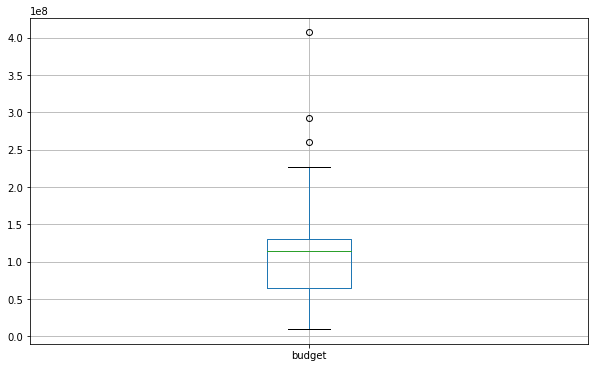

In [38]:
inv_bud_df.boxplot(figsize=(10, 6));

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [39]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [40]:
def create_columns(data, columns):
    for i in columns:
        data[f'chief_{i}'] = data[i].dropna().apply(lambda x: x.split(', ')[0]) # [0] чтобы извлечь значение, а не список
    return data

data = create_columns(data, ['director', 'genres'])
data.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,year,chief_director,chief_genres
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик, драма, мелодрама",NaN,NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма, военный",NaN,NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика, боевик, триллер",NaN,NaN,2016,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
print('Чаще всего доля участия государства в бюджете составляет', support_percentage*100)

Чаще всего доля участия государства в бюджете составляет 61.40376284219444


**Выводы:**  

1) В данных присутствуют пропуски, возможными причинами которых могут быть: ошибки ввода данных, намеренное сокрытие информации, технический сбой. Т.к. не получилось заполнить пропуски взяв недостающую информацию из других столбцов, было принято решение оставить все как есть.  
2) Были обнаружены и обработаны дубликаты в следующих столбцах:  
- в title, причина повторов в которой может быть в том, что один и тот же фильм могут показывать в разное время с разной лицензией и т.д., поэтому было принято решение оставить все без изменений;
- Два разных фильма ("Как жениться и остаться холостым" и "Иоанна - женщина на папском престоле /По роман...") с одной датой премьеры (2010-12-17 12:00:00+00:00) с одинаковым номером прокатного удостоверения. Возможная причина: ошибка при вводе данных. Но т.к. это не повлияет на дальнейшее исследование, оставил все без изменений.
- После удаления всех существующих пробелов в столбцах 'director', 'producer', 'film_studio', 'production_country', 'genres', число дубликатов в них также уменьшилось.
- Также был обработан столбец type путем удаления пробелов в начале названий жанров, после чего количество дубликатов также уменьшилось.  

3) Было обнаружено, что есть фильмы, которые получали господдержку, но в столбце бюджет стоит значение 0, а также что чаще всего доля участия государства в бюджете составляет 61%. Такие столбцы с нулевым бюджетом были заменены медианным значением от господдержки.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [42]:
films_by_year = data.loc[data['box_office'].notna(), ['year', 'box_office']].groupby('year').agg(['count', 'sum', 'mean', 'median'])
films_by_year

box_office                                           
          count              sum          mean      median
year                                                      
2010        105      2,428,654.0      23,130.0     1,700.0
2011        109     14,102,765.0     129,383.2     3,000.0
2012        128      6,955,423.0      54,339.2     5,660.0
2013        184     29,799,706.2     161,954.9     3,522.5
2014        279  7,444,951,859.2  26,684,415.3    18,160.0
2015        465 39,497,365,196.4  84,940,570.3 4,920,933.0
2016        526 47,866,299,741.9  91,000,569.9 3,846,679.4
2017        357 48,563,707,217.5 136,032,793.3 9,968,340.0
2018        475 49,668,403,134.3 104,565,059.2 8,891,102.2
2019        530 48,425,708,779.6  91,369,261.8 4,627,798.3

In [43]:
# Выберем 2-й уровень столбцов
films_by_year.columns = films_by_year.columns.get_level_values(1)
films_by_year

,count,sum,mean,median
year,,,,
2010,105,"2,428,654.0","23,130.0","1,700.0"
2011,109,"14,102,765.0","129,383.2","3,000.0"
2012,128,"6,955,423.0","54,339.2","5,660.0"
2013,184,"29,799,706.2","161,954.9","3,522.5"
2014,279,"7,444,951,859.2","26,684,415.3","18,160.0"
2015,465,"39,497,365,196.4","84,940,570.3","4,920,933.0"
2016,526,"47,866,299,741.9","91,000,569.9","3,846,679.4"
2017,357,"48,563,707,217.5","136,032,793.3","9,968,340.0"
2018,475,"49,668,403,134.3","104,565,059.2","8,891,102.2"


Доля фильмов, для которых есть информация о прокате в кинотеатрах: 0.42


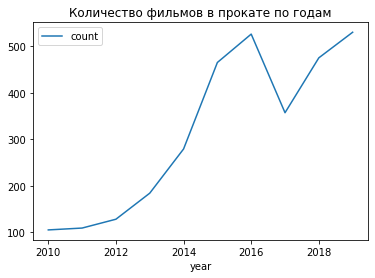

In [44]:
films_by_year.plot(title='Количество фильмов в прокате по годам', kind='line', y='count')
print(f'Доля фильмов, для которых есть информация о прокате в кинотеатрах: {data.box_office.notna().mean():.2f}')

**Пик пришелся на 2016 и 2019 годы.**

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

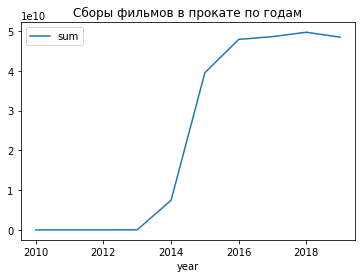

In [45]:
films_by_year.plot(title='Сборы фильмов в прокате по годам', kind='line', y='sum');

**С 2010 по 2013 гг. сумма сборов была самой низкой, а начиная с 2016 - максимальной.**

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [46]:
print(films_by_year['mean'])
print()
print(films_by_year['median'])

year
2010        23,130.0
2011       129,383.2
2012        54,339.2
2013       161,954.9
2014    26,684,415.3
2015    84,940,570.3
2016    91,000,569.9
2017   136,032,793.3
2018   104,565,059.2
2019    91,369,261.8
Name: mean, dtype: float64

year
2010       1,700.0
2011       3,000.0
2012       5,660.0
2013       3,522.5
2014      18,160.0
2015   4,920,933.0
2016   3,846,679.4
2017   9,968,340.0
2018   8,891,102.2
2019   4,627,798.3
Name: median, dtype: float64


- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [47]:
age = data[data['box_office'].notna()].pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
age

age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2010,"1,887,611.0","120,146.0","366,512.0","54,385.0",NaN
2011,"13,499,871.0","219,891.0","381,513.0","1,040.0",450.0
2012,"2,266,483.0","108,734.0","3,254,216.0","182,580.0","1,143,410.0"
2013,"2,710,302.5","20,910,336.5","658,069.6","5,161,245.6","359,752.0"
2014,"375,562,258.2","2,584,782,324.0","544,280,086.7","2,209,712,746.9","1,730,614,443.4"
2015,"379,054,578.4","13,616,082,008.9","11,368,120,870.3","5,432,308,367.4","8,701,799,371.4"
2016,"150,228,848.7","12,204,446,524.4","16,664,548,541.7","6,793,929,818.9","12,053,146,008.2"
2017,"229,598,930.0","7,851,427,660.7","18,745,042,900.1","9,651,495,581.0","12,086,142,145.8"
2018,"32,449,002.1","14,267,291,660.7","16,503,602,347.0","8,760,085,501.1","10,104,974,623.4"


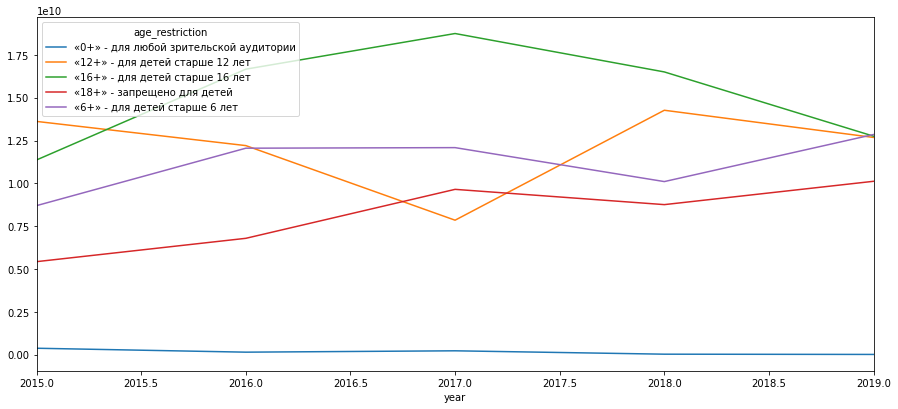

In [48]:
age.plot(kind='line', xlim=[2015, 2019], figsize=(15, 6.5));

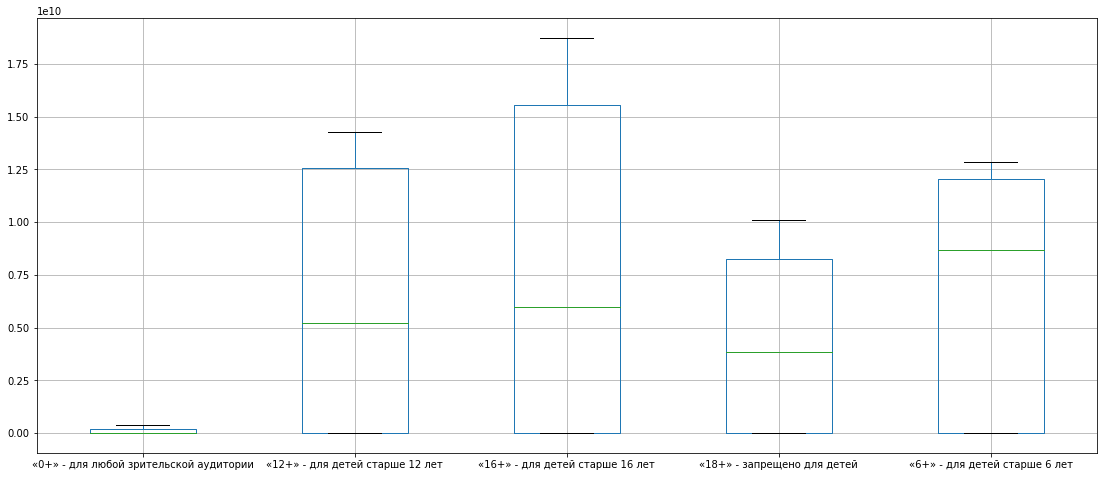

In [49]:
age.boxplot(figsize=(19, 8));

Как видно из графика, в категории "для любой зрительской аудитории" были стабильно околонулевые сборы, а категория "16+" собрала больше всего денег в прокате из всех остальных категорий и пик пришелся на 2017 год, когда в том же году категория "12+" собрала наименьшую сумму на прокате. Однако начиная с 2018 года и до 2019 года эти две категории сходятся в итоге в равную сумму сборов, и в целом имеют противоположную тенденцию движения графика. Другие две категории "18+" и "6+" имеют одинаковую тенденцию движения графика, однако категория "6+" стабильно собирает больше категории "18+". Из этого можно сделать вывод о том, что картина меняется в зависимости от года и это может быть связано с тем, что поколения сменяют друг друга, люди растут и их предпочтения с каждым годом меняются.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [50]:
# Создадим переменную, в которой сохраним данные только фильмов с господдержкой
state_support = data[data['refundable_support'].notna() | data['nonrefundable_support'].notna()]
state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,support_percentage,year,chief_director,chief_genres
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма, мелодрама","365,353.6",0.3,2013,А.Атанесян,драма
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0",0.7,2014,А.Якимчук,NaN
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия, фантастика","19,957,031.5",0.6,2013,Р.Давлетьяров,комедия
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5",0.7,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0",0.6,2014,М.Угаров,драма


In [51]:
state_support.describe()

,puNumber,refundable_support,nonrefundable_support,budget,ratings,box_office,support_percentage,year
count,332.0,332.0,332.0,332.0,316.0,318.0,332.0,332.0
mean,"111,593,819.1","11,864,457.8","48,980,988.9","134,057,765.8",6.0,"132,432,420.0",inf,"2,016.7"
std,"5,703,031.3","24,916,555.3","59,980,117.9","187,685,540.5",1.1,"334,837,857.0",NaN,1.6
min,"111,000,115.0",0.0,0.0,"9,771,388.1",1.0,"1,550.0",0.0,"2,013.0"
25%,"111,004,891.5",0.0,"25,000,000.0","46,153,971.8",5.3,"1,236,675.5",0.4,"2,015.0"
50%,"111,010,367.0",0.0,"30,000,000.0","74,592,550.0",6.2,"15,720,067.7",0.6,"2,017.0"
75%,"111,017,815.8","15,000,000.0","40,375,000.0","150,002,143.2",6.7,"106,373,008.3",0.7,"2,018.0"
max,"214,010,116.0","180,000,000.0","400,000,000.0","2,305,074,303.0",9.4,"3,073,568,690.8",inf,"2,019.0"


In [52]:
state_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [53]:
# Создадим столбец, в котором сохраним сумму объёма возвратных и невозвратных средств государственной поддержки
total = state_support['nonrefundable_support'] + state_support['refundable_support']
state_support = state_support.assign(total_support=total)
state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,budget,financing_source,ratings,genres,box_office,support_percentage,year,chief_director,chief_genres,total_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,"79,411,900.0",Министерство культуры,8.1,"драма, мелодрама","365,353.6",0.3,2013,А.Атанесян,драма,"26,500,000.0"
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,"37,142,857.0",Министерство культуры,NaN,NaN,"28,140.0",0.7,2014,А.Якимчук,NaN,"26,000,000.0"
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,"176,023,490.0",Фонд кино,5.3,"комедия, фантастика","19,957,031.5",0.6,2013,Р.Давлетьяров,комедия,"107,847,945.0"
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,"40,574,140.0",Министерство культуры,4.2,драма,"55,917.5",0.7,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.0"
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,"40,015,122.0",Министерство культуры,6.4,драма,"232,100.0",0.6,2014,М.Угаров,драма,"25,000,000.0"


In [54]:
# Добавим также столбец доходности
profit = state_support['box_office'] / state_support['total_support']
state_support = state_support.assign(profitability=profit)
state_support.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,financing_source,ratings,genres,box_office,support_percentage,year,chief_director,chief_genres,total_support,profitability
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,8.1,"драма, мелодрама","365,353.6",0.3,2013,А.Атанесян,драма,"26,500,000.0",0.0
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,Министерство культуры,NaN,NaN,"28,140.0",0.7,2014,А.Якимчук,NaN,"26,000,000.0",0.0
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,Фонд кино,5.3,"комедия, фантастика","19,957,031.5",0.6,2013,Р.Давлетьяров,комедия,"107,847,945.0",0.2
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,4.2,драма,"55,917.5",0.7,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,"28,000,000.0",0.0
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,Министерство культуры,6.4,драма,"232,100.0",0.6,2014,М.Угаров,драма,"25,000,000.0",0.0


In [55]:
# Добавим также столбцы, показывающие окупились ли проекты или нет
payoff = state_support['profitability'] > 0
state_support = state_support.assign(is_paid_off=payoff)

not_payoff = ~state_support['is_paid_off']
state_support = state_support.assign(is_not_paid_off=not_payoff)

state_support.tail()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,support_percentage,year,chief_director,chief_genres,total_support,profitability,is_paid_off,is_not_paid_off
7464,Союз спасения,111022019,2019-12-26 12:00:00+00:00,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.0",...,"история, биография, драма","717,703,185.5",0.5,2019,А.Кравчук,история,"500,000,000.0",1.4,True,False
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20 12:00:00+00:00,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.0",...,"мультфильм, приключения, семейный","501,069,235.0",0.5,2019,Д.Шмидт,мультфильм,"100,000,000.0",5.0,True,False
7474,Вторжение,111022519,2019-12-23 12:00:00+00:00,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.0",...,"фантастика, боевик",NaN,0.5,2019,Ф.Бондарчук,фантастика,"500,000,000.0",NaN,False,True
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.0,...,драма,NaN,0.6,2019,И.Северов,драма,"30,000,000.0",NaN,False,True
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.0",...,"комедия, фантастика, мелодрама",NaN,0.7,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,"100,000,000.0",NaN,False,True


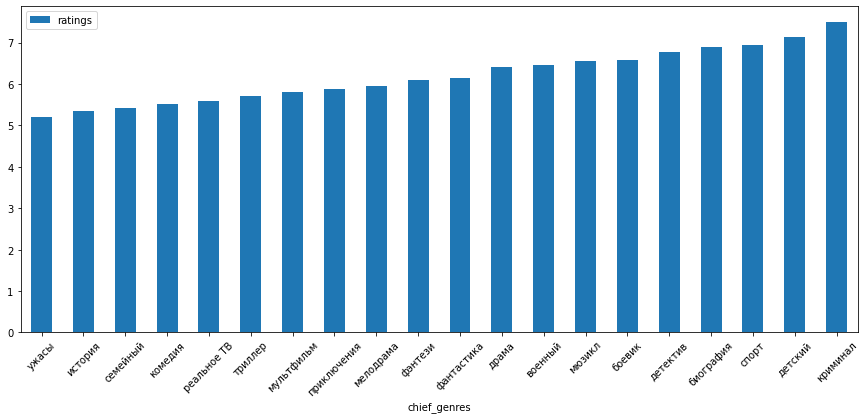

In [56]:
# Сгруппируем данные по самым популярным жанрам и посмотрим на их рейтинги
state_support[['chief_genres', 'ratings']].groupby('chief_genres').agg('mean').sort_values(by='ratings') \
                                                        .plot(kind='bar', figsize=(15, 6), rot=45);

**Как видно из графика, самые высокие оценки получили фильмы с жанрами "биография", "спорт", "детский" и "криминал".**

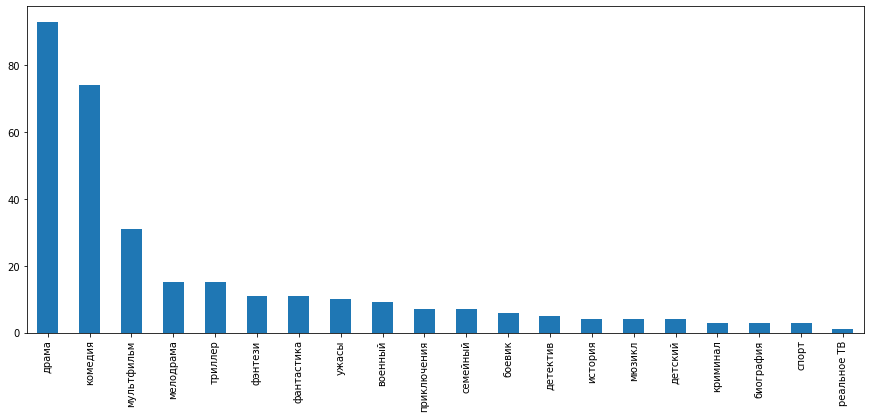

In [57]:
# Выведем количество фильмов по каждому уникальному жанру, получивших господдержку 
state_support['chief_genres'].value_counts().plot(kind='bar', figsize=(15, 6));

**Как видно из графика, наибольшее число фильмов в жанрах драма, комедия и мультфильм.**

<AxesSubplot:xlabel='chief_genres'>

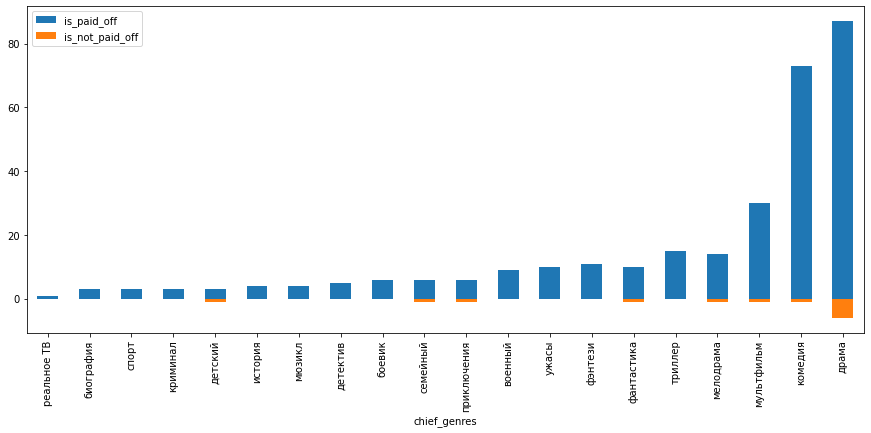

In [58]:
# Вычислим и выведем в виже графика количество окупившихся и не окупившихся фильмов в каждом жанре
state_support.groupby('chief_genres').agg({'title': 'count', 'is_paid_off': 'sum', 'is_not_paid_off': lambda x: 0 - x.sum()}) \
            .sort_values(by='title').plot(kind='bar', stacked=True, y=['is_paid_off', 'is_not_paid_off'], figsize=(15, 6))

**Как мы видим, большинство проектов окупились, лучшие результаты показали жанры драма, комедия и мультфильмы, и в этих же жанрах наблюдается наибольшее число фильмов, как стало ясно из предыдущего графика.**

<AxesSubplot:xlabel='chief_genres'>

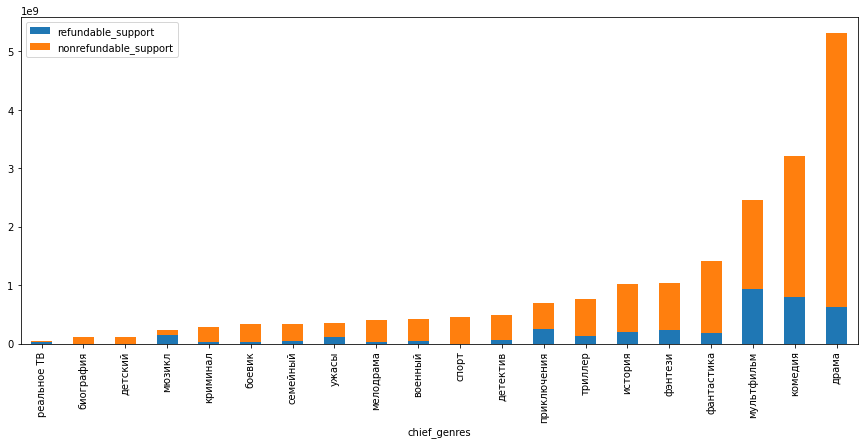

In [59]:
# посмотрим на обьемы господдержки по каждому жанру
state_support.groupby('chief_genres').agg('sum').sort_values(by='total_support').plot(kind='bar', stacked=True,
                  y=['refundable_support', 'nonrefundable_support'], figsize=(15, 6))

**Очевидно, что объём невозвратных средств государственной поддержки существенно превышает объём возвратных средств.**

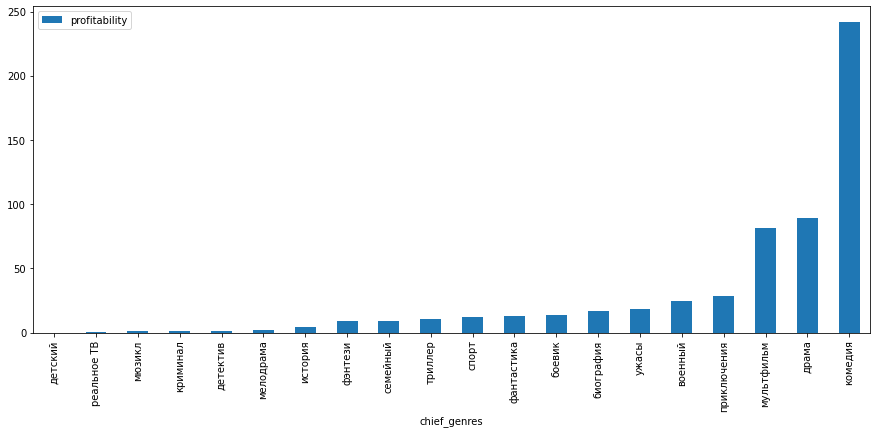

In [60]:
# Посмотрим на общую доходность каждого жанра
state_support.groupby('chief_genres').agg('sum').sort_values(by='profitability') \
.plot(kind='bar',stacked=True, y='profitability', figsize=(15, 6));

**Наибольшую доходность также показали три жанра: мультфильм, комедия и драма, при этом жанр комедия показал наивысший результат доходности.**

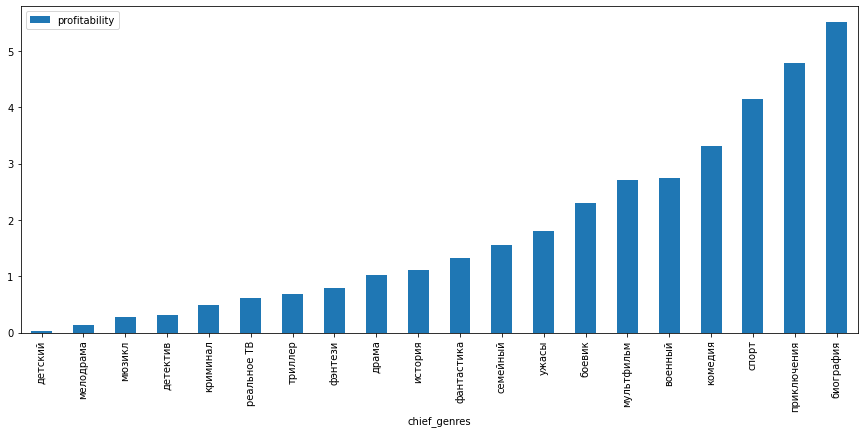

In [61]:
# Посмотрим на среднюю доходность каждого жанра
state_support.groupby('chief_genres').agg('mean').sort_values(by='profitability') \
.plot(kind='bar',stacked=True, y='profitability', figsize=(15, 6));

**Картина резко меняется при выводе средних показателей доходности: наивысшие результаты показывают три других жанра - биография, приключения и спорт, а комедия, мультфильмы и драма демонстрируют посредственные результаты.**

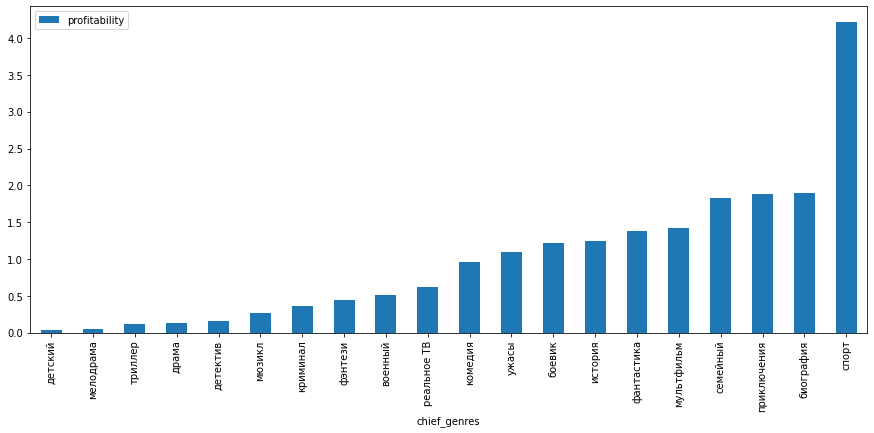

In [62]:
# Посмотрим на медианную доходность каждого жанра
state_support.groupby('chief_genres').agg('median').sort_values(by='profitability') \
.plot(kind='bar',stacked=True, y='profitability', figsize=(15, 6));

**Картина не изменилась.**

### Шаг 5. Напишите общий вывод

**Из исследования данных можно сделать следующие выводы**:  

- Наибольшее количество фильмов в прокате было в 2016 и 2019 годы.  
- С 2010 по 2013 гг. сумма сборов была самой низкой, а начиная с 2016 - максимальной.  
- В категории "для любой зрительской аудитории" были стабильно около-нулевые сборы, а категория "16+" собрала больше всего денег в прокате из всех остальных категорий и пик пришелся на 2017 год, когда в том же году категория "12+" собрала наименьшую сумму на прокате. Однако начиная с 2018 года и до 2019 года эти две категории сходятся в итоге в равную сумму сборов, и в целом имеют противоположную тенденцию движения графика. Другие две категории "18+" и "6+" имеют одинаковую тенденцию движения графика, однако категория "6+" стабильно собирает больше категории "18+". Из этого можно сделать вывод о том, что картина меняется в зависимости от года и это может быть связано с тем, что поколения сменяют друг друга, люди растут и их предпочтения с каждым годом меняются.  
- Самые высокие оценки получили фильмы с жанрами "биография", "спорт", "детский" и "криминал".  
- Наибольшее число фильмов было в жанрах драма, комедия и мультфильм.  
- Большинство проектов окупились, лучшие результаты показали жанры драма, комедия и мультфильмы, и в этих же жанрах наблюдается наибольшее число фильмов.  
- Объём невозвратных средств государственной поддержки существенно превышает объём возвратных средств.  
- Наибольшую общую доходность, если считать в сумме по каждому жанру, также показали три указанных выше жанра: мультфильм, комедия и драма, при этом жанр комедия показал наивысший результат доходности.  
- Однако картина резко меняется при выводе средних и медианных показателей доходности: наивысшие результаты показывают три других жанра - биография, приключения и спорт, а комедия, мультфильмы и драма демонстрируют посредственные результаты.  


**Рекомендации заказчику:**  

    1) Обратить внимание на то, какое поколение наибольшее по численности в каждом конкретном году и каковы их предпочтения;  
    2) Обратить внимание на жанры с самыми высокими рейтингами ("биография", "спорт", "детский" и "криминал") и с самой высокой медианной доходностью (а не просто количеством окупившихся проектов) - "биография", "приключения" и "спорт";  
    3) Более тщательно собирать данных, чтобы в них не было много пропусков и дубликатов.